# Statistics: MonteCarlo Methods
26 January 2020


Author: Laura V. Trujillo T 

e-mail: [lvtrujillot@unal.edu.co](lvtrujillot@unal.edu.co)



## 1. Metropolis for hard disks
_Two disks of radius **R** in a square box of side **L** which each walker is made of 4 coordinates. Start with several walkers and iterate checking the convergence of quantities such as the distance between them. Repeat for disks in a sphere of radius **L**_


In [10]:
#Parameters
N <- 1000
L <- 1
R <- 0.2

#Function distance
d <- function(x1, x2, y1, y2){
    X <- (x2 - x1)^2
    Y <- (y2 - y1)^2
    return(sqrt(X + Y))
}

#Walkers
delta_x <- runif(N, 0, 0.5 * L)
delta_y <- runif(N, 0, 0.5 * L)
r0 <- runif(N, 0, 0.5 * L)
rp0 <- runif(N, 0, 0.5 * L)
#Inital positions 
x0 <- r0 + delta_x
y0 <- r0 + delta_y

xp0 <- rp0  + delta_x
yp0 <- rp0 + delta_y

# Disks' new positions
x1 <-  ifelse(d(x0, xp0, y0, yp0)  > 2 * R  && d(x0, xp0, y0, yp0) < L + 2 * R , r0 + delta_x, r0)
y1 <-  r0 + delta_y

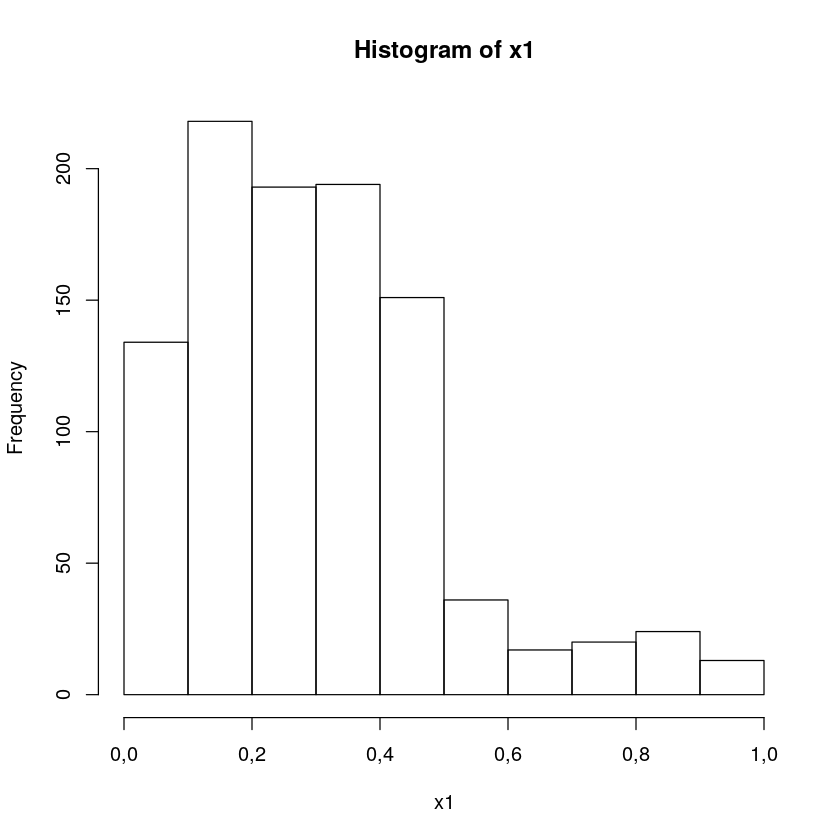

In [11]:
hist(x1)